In [ ]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

In [ ]:
sol = np.load("/content/drive/MyDrive/PSO_execs/Kacem/exec7/problem1/cof5/solution_aprout2_exec13.npy")
decoder_data = np.load("/content/drive/MyDrive/PSO_execs/FilteredDataSets/all_decoder_data.npy", allow_pickle=True)

In [ ]:
tp = decode(sol)
np.save("sttime.npy", tp[0])
np.save("edtime.npy", tp[1])

In [ ]:
start_time = np.load("sttime.npy")
end_time = np.load("edtime.npy")
plot_data = dict_to_plot_of_solution(start_time, end_time)
np.save("plot_data.npy", plot_data)

In [ ]:
decode(sol, True)

In [ ]:
def dict_to_plot_of_solution(start_time, end_time):
  operations = {}
  for machine in range( decoder_data["quant_of_machines"] ):
    for operation in range( decoder_data["half_of_scheduling"] ):
      current_start_time      = start_time[machine][operation]
      current_end_time        = end_time[machine][operation]
      current_diference_time  = current_end_time - current_start_time
      operation_tuple = find_machine_of_a_operation(operation)
      operation_data = {
        "id"              : operation,
        "machine"         : operation_tuple[0],
        "operation_tuple" : operation_tuple,
        "start_time"      : current_start_time,
        "duration"        : current_diference_time
      }
      operations[operation] = operation_data
  #
  return operations

In [ ]:
plot_data = np.load("plot_data.npy", allow_pickle=True)[()]

In [ ]:

exec        = 1
problem     = 1
cof         = 5
aprout      = 2
aprout_exec = 13
base = "/content/drive/MyDrive/PSO_execs/Kacem/"
sol = np.load(f"{base}/exec{exec}/problem{problem}/cof{cof}/solution_aprout{aprout}_exec{aprout_exec}.npy")
print(sol)

[5 1 2 1 5 3 3 2 1 4 4 3 3 2 4 3 3 1 4 3 2 2 1 1]


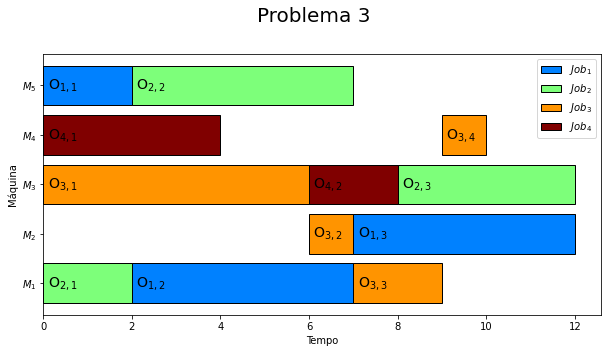

In [490]:
# Definições 
#'binary_r', 'coolwarm', 'gnuplot', 'rainbow', 'plasma', 'jet'
figsize         = (10,5)
subplots_adjust = 0.85
exec            = 1
problem         = 1
cof             = 5
aprout          = 2
aprout_exec     = 13
size            = 50
color_map       = 'jet'
tx = 0.08
ty = 0.9
anotacao = False
solution_gantt_plot(size,color_map,exec,problem,cof,aprout,aprout_exec, tx, ty, anotacao)

In [489]:
#### Isolamento ####
def solution_gantt_plot(size,colormap,exec,problem_num,cof,aprout,aprout_exec, tx, ty, anotacao):
  base = "/content/drive/MyDrive/PSO_execs/Kacem/"
  sol = np.load(f"{base}/exec{exec}/problem{problem_num}/cof{cof}/solution_aprout{aprout}_exec{aprout_exec}.npy")
  decoded = decode(sol,problem_num, False)
  start_time  = decoded[0]
  end_time    = decoded[1]
  cNorm  = colors.Normalize(vmin=0, vmax=decoder_data[problem_num]["quant_of_jobs"])
  jet = cm = plt.get_cmap(colormap) 
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
  names_aprout = ["PSO Base", "Componente Dinâmico"]
  text = f"Solution Space: {exec}\nTamanho: {size}x{size}\nTécnica: {names_aprout[aprout-1]}\nExecução: {aprout_exec}"
  plots = {}
  for j in range(1, decoder_data[problem_num]["quant_of_jobs"]+1):
    plots[j] = []
  #
  fig = plt.figure(figsize=figsize)
  ax = fig.subplots()
  fig.suptitle(f"Problema {p_num}", fontsize=20)
  plt.subplots_adjust(top=subplots_adjust)
  if anotacao:
    fig.text(tx,ty,text, fontsize=12)

  for machine in range( decoder_data[problem_num]["quant_of_machines"] ):    # 10
    for j in range( decoder_data[problem_num]["half_of_scheduling"] ):       # 30
      current_start_time      = start_time[machine][j]
      current_end_time        = end_time[machine][j]
      current_diference_time  = current_end_time - current_start_time
      if end_time[machine][j] != 0 and end_time[machine][j] - start_time[machine][j] != 0:
        operation = find_machine_of_a_operation(j, problem_num)
        bar_left  = current_start_time
        bar_width = current_diference_time
        bar_str   = r'$\mathrm{O_{%d,%d}}$' % (operation[0], operation[1])
        job = operation[0]
        plot = ax.barh(
          y=machine, 
          width=bar_width, 
          left=bar_left, 
          color=scalarMap.to_rgba(job), 
          edgecolor='black', 
        )
        ax.text(
          x=bar_left + 0.1, 
          y=machine, 
          s=bar_str, 
          fontsize=14,
          va="center"
        )
        plots[job].append(plot)
    #
  #
  #ax.set_title(title)
  ax.set_xlabel("Tempo")
  ax.set_ylabel("Máquina")
  jobs = []
  labels = []
  for j in range(1, decoder_data[problem_num]["quant_of_jobs"]+1):
    jobs.append(plots[j][0])
    labels.append(r'$Job_{%d}$' % j)
  #

  machines = []
  for m in range(1, decoder_data[problem_num]["quant_of_machines"]+1):
    machines.append(r'$M_{%d}$' % m)
  #
  plt.legend(jobs, labels)
  plt.yticks(np.arange(machine + 1), machines)


  plt.show()
#
#solution_gantt_plot(size,color_map,exec,problem,cof,aprout,aprout_exec)

##Decoder data

In [ ]:
base_path = '/content/drive/MyDrive/PSO_execs/Kacem/exec1'
decoder_data = {
  1: {
    "quant_of_jobs":             4,
    "quant_of_machines":         5,
    "quant_operations_per_jobs": [3, 3, 4, 2],
    "max_of_operations":         4,
    "half_of_scheduling":        12,
    "process_times":             np.load(f"{base_path}/problem{1}/cof{3}/decoder_process_times.npy")
  },
  2: {
    "quant_of_jobs":             10,
    "quant_of_machines":         7,
    "quant_operations_per_jobs": [3, 2, 3, 3, 3, 3, 3, 3, 3, 3],
    "max_of_operations":         3,
    "half_of_scheduling":        29,
    "process_times":             np.load(f"{base_path}/problem{4}/cof{3}/decoder_process_times.npy")
  },
  3: {
    "quant_of_jobs":             10,
    "quant_of_machines":         10,
    "quant_operations_per_jobs": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    "max_of_operations":         3,
    "half_of_scheduling":        30,
    "process_times":             np.load(f"{base_path}/problem{4}/cof{3}/decoder_process_times.npy")
  },
  4: {
    "quant_of_jobs":             15,
    "quant_of_machines":         10,
    "quant_operations_per_jobs": [4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4],
    "max_of_operations":         4,
    "half_of_scheduling":        56,
    "process_times":             np.load(f"{base_path}/problem{4}/cof{3}/decoder_process_times.npy")
  }
}
#np.save("/content/drive/MyDrive/PSO_execs/FilteredDataSets/all_decoder_data.npy", decoder_data)

#Originais


In [ ]:
### PLOT Original ###

for machine in range( decoder_data["quant_of_machines"] ):    # 10
  for j in range( decoder_data["half_of_scheduling"] ):       # 30
    current_start_time      = start_time[machine][j]
    current_end_time        = end_time[machine][j]
    current_diference_time  = current_end_time - current_start_time
    #if current_diference_time > 0:
    if end_time[machine][j] != 0 and end_time[machine][j] - start_time[machine][j] != 0:
      operation = find_machine_of_a_operation(j)
      bar_left  = current_start_time
      bar_width = current_diference_time
      bar_color = colors[operation[0] - 1]
      bar_str   = operation
      plt.barh(y=machine, width=bar_width, height=0.5, left=bar_left, color=bar_color, edgecolor='black')
      plt.text(x=bar_left + 0.1, y=machine, s=bar_str, fontsize=8)
#
#ax.yticks(np.arange(machine + 1), np.arange(1, machine + 2))
#plt.yticks(np.arange(machine + 1), np.arange(1, machine + 2))

plt.show()

# Codigos Auxiliares

### Decode Function

In [ ]:
def decode(scheduling, problem_num, plot_scheduling=False, fig=None):
  machines_matrix = np.zeros((decoder_data[problem_num]["quant_of_jobs"], decoder_data[problem_num]["max_of_operations"]), dtype=int)
  times_matrix    = np.zeros((decoder_data[problem_num]["quant_of_jobs"], decoder_data[problem_num]["max_of_operations"]), dtype=int)

  machines_scheduling   = scheduling[:decoder_data[problem_num]["half_of_scheduling"]]
  operations_scheduling = scheduling[decoder_data[problem_num]["half_of_scheduling"]:]

  operation_index = 0
  for i in range( decoder_data[problem_num]["quant_of_jobs"] ):
    for j in range( decoder_data[problem_num]["quant_operations_per_jobs"][i] ):
      count = 0
      process_time = decoder_data[problem_num]["process_times"][operation_index]

      for index in range( len(process_time) ):
        if process_time[index] != -1:
          count+=1

        if count == machines_scheduling[operation_index]:
          machines_matrix[i][j] = index+1
          times_matrix[i][j]  = process_time[index]
          break

      operation_index+=1

    #print(machines_matrix)
    #print(times_matrix)

  start_time = np.zeros(
    (decoder_data[problem_num]["quant_of_machines"], decoder_data[problem_num]["half_of_scheduling"]),
    dtype=int
  )

  end_time = np.zeros(
    (decoder_data[problem_num]["quant_of_machines"], decoder_data[problem_num]["half_of_scheduling"]),
    dtype=int
  )

  op_count_dict = {}
  machine_operations = np.zeros(decoder_data[problem_num]["quant_of_machines"], dtype=int)

  for os in operations_scheduling:
    if os in op_count_dict:
      op_count_dict[os] += 1
    else:
      op_count_dict[os] = 1
    #

    operation_count = op_count_dict[os]
    operation_index = find_one_operation_in_a_machine(os, operation_count, problem_num)

    machine_number     = machines_matrix[os-1][operation_count-1]
    pro_time           = times_matrix [os-1][operation_count-1]

    machine_operation  = machine_operations[machine_number-1]
    current_start_time = start_time[machine_number-1][operation_index]
    current_end_time   = end_time  [machine_number-1][operation_index]

    previous_operation_index = find_one_operation_in_a_machine(os, operation_count - 1, problem_num)
    previous_machine_number = machines_matrix[os-1][operation_count-2]

    if machine_operation == 0 and operation_count == 1 :
      current_start_time = 0
      current_end_time   = pro_time
    #

    elif machine_operation == 0 and operation_count > 1 :
      prev_m_num          = machines_matrix[os-1][operation_count-2]
      prev_end_time       = end_time[prev_m_num-1][previous_operation_index]
      current_start_time  = prev_end_time
      current_end_time    = prev_end_time + pro_time
    #

    elif machine_operation > 0:
      flag=0
      prev_end_time = 0

      if operation_count == 1 :
        free_start = 0
      else:
        prev_end_time = end_time[previous_machine_number-1][previous_operation_index]
        free_start = prev_end_time
      #

      order_start_time = np.sort(start_time[machine_number-1][end_time[machine_number-1] > 0])
      order_end_time   = np.sort(end_time  [machine_number-1][end_time[machine_number-1] > 0])

      for index in range(len(order_start_time)):
        if order_start_time[index] - free_start >= pro_time:
          current_start_time = free_start
          current_end_time   = free_start + pro_time
          flag = 1
          break
        #

        if order_end_time[index] - free_start >= 0:
          free_start = order_end_time[index]
        #
      #

      if flag == 0:
        free_start = max(np.max(end_time[machine_number-1]), prev_end_time)
        current_start_time = free_start
        current_end_time   = free_start + pro_time
      #
    #

    machine_operation += 1

    machine_operations[machine_number - 1]          = machine_operation
    start_time[machine_number - 1][operation_index] = current_start_time
    end_time  [machine_number - 1][operation_index] = current_end_time
  #
  
  #print(scheduling)
  if plot_scheduling:
    draw_gatt(start_time, end_time, fig)
  #

  fitness = np.max(end_time)
  #return fitness
  return (start_time, end_time)
#

### Gantt Plot Function


In [ ]:
def draw_gatt(start_time, end_time, fig):
  colors = { 0:'red', 1:'blue', 2:'yellow', 3:'orange', 
    4:'green', 5:'palegoldenrod',6:'purple', 7:'pink', 
    8:'Thistle', 9:'Magenta',10:'SlateBlue', 11:'RoyalBlue', 
    12:'Cyan', 13:'Aqua',14:'floralwhite',15:'ghostwhite'
  }
  #ax = plt.figure()
  # i = Machine_index ; j = Operation_index
  for i in range( decoder_data["quant_of_machines"] ): # Vai de linha em linha do plot (começando do 0)
    for j in range( decoder_data["half_of_scheduling"] ):
      current_start_time      = start_time[i][j]
      current_end_time        = end_time[i][j]
      current_diference_time  = current_end_time - current_start_time
      #if current_diference_time > 0:
      if end_time[i][j] != 0 and end_time[i][j] - start_time[i][j] != 0:
        operation = find_machine_of_a_operation(j)
        bar_width = current_diference_time
        bar_left = current_start_time
        bar_color = colors[operation[0] - 1]
        #bar_str = operation[0] # Somente o numero do Job
        bar_str = operation     # Numero do Job e da Operação

        plt.barh(y=i, width=bar_width, height=0.5, left=bar_left, color=bar_color, edgecolor='black')
        plt.text(x=bar_left + 0.1, y=i, s=bar_str, fontsize=8)
  #
  #ax.yticks(np.arange(i + 1), np.arange(1, i + 2))
  plt.yticks(np.arange(i + 1), np.arange(1, i + 2))

  plt.show()
  pass
#

### Find Operation Function

In [ ]:
def find_one_operation_in_a_machine(i, j, problem_num):
  if i == 1:
    op_index = j - 1
  else:
    op_index = sum(decoder_data[problem_num]["quant_operations_per_jobs"][:i - 1]) + j - 1

  return op_index


----

### Find Machine

In [ ]:
def find_machine_of_a_operation(operation_index, problem_num):
  job_op_list = [
      (i + 1, j + 1) for i in range( decoder_data[problem_num]["quant_of_jobs"] ) for j in range(decoder_data[problem_num]["quant_operations_per_jobs"][i])
  ]
  job_op = job_op_list[operation_index]
  return job_op
#

----